---
title: "선형모형의 적"
author: "강신성"
date: "2023-10-29"
date-format: iso
categories: [python, MultipleLinearity, Outlier]
---




> 우리의 주적은 북한인데, 선형모형의 적은?

###### 해당 자료는 전북대학교 통계학과 최규빈 교수님의 강의 내용을 토대로 재구성되었음을 밝힙니다.

## 1. 라이브러리 imports

In [60]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.impute
import seaborn as sns
import sklearn.tree

## 2. 선형모형의 적

### **A. 결측치의 존재**
---




<span style=color:red>문제</span> : 데이터에서 누락된 값이 있는 경우, 선형모델이 돌아가지 않는다.

\- 해결방안

1 : 결측치를 제거

> * 결측치가 포함된 열을 제거
>
> * 결측치가 포함된 행을 제거
>
> * 둘을 혼합

2. 결측치를 impute

> * train에서는 fit_transform, test에서는 transform
>
> * train, test에서 모두 fit_transform
> * 임의의 값으로 일괄 impute
> * interploation(이미지 또는 시계열, 근처의 값과 자연스럽게 연동되도록 만들 수 있음)
> * ~train, test data를 합쳐서 fit_transform~ <span style=color:red>이건 정보누수로 실격사유가 된다</span>

\- 사용 가능한 코드나 모듈

> `isna()`, `dropna()`, `sklearn.inpute`의 하위 모듈 등.

### **B. 다중공선성의 존재**
---




<span style=color:red>문제</span> : 데이터의 설명변수가 역할이 겹칠 경우, 선형모형의 일반화 성능이 좋지 않음.

\- 해결방안

> * 변수 제거
> > 설명변수 간 corr을 파악하고, 느낌적으로 제거
> >
> >  PCA 등 차원축소기법을 이용한 제거
> * 공선성을 가지는 변수를 모아 새로운 변수로 변환
> > 느낌적으로 변환
> >
> > PCA를 이용한 변환
> 
> * Lasso, Ridge 등 패널티 계열을 사용
> > Lasso : l1 / liblinear
> >
> > Ridge : l2
> >
> > Elastic net

\- corr파악 후 느낌적으로 제거의 예시

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
X = df.loc[:,'gpa':'toeic2']
X

,gpa,toeic,toeic0,toeic1,toeic2
0,0.051535,135,129.566309,133.078481,121.678398
1,0.355496,935,940.563187,935.723570,939.190519
2,2.228435,485,493.671390,493.909118,475.500970
3,1.179701,65,62.272565,55.957257,68.521468
4,3.962356,445,449.280637,438.895582,433.598274
...,...,...,...,...,...
495,4.288465,280,276.680902,274.502675,277.868536
496,2.601212,310,296.940263,301.545000,306.725610
497,0.042323,225,206.793217,228.335345,222.115146
498,1.041416,320,327.461442,323.019899,329.589337


In [9]:
X.corr()

,gpa,toeic,toeic0,toeic1,toeic2
gpa,1.000000,-0.033983,-0.035722,-0.037734,-0.034828
toeic,-0.033983,1.000000,0.999435,0.999322,0.999341
toeic0,-0.035722,0.999435,1.000000,0.998746,0.998828
toeic1,-0.037734,0.999322,0.998746,1.000000,0.998721
toeic2,-0.034828,0.999341,0.998828,0.998721,1.000000


> pandas의 데이터프레임에는 자체적으로 해당 메소드를 지원한다.

<Axes: >

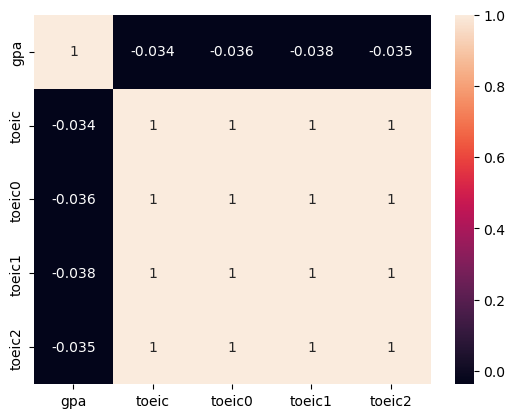

In [8]:
sns.heatmap(X.corr(), annot = True)

\- toeic과 유사 toeic끼리 상관성이 짙네?

> 제거한다.

### **C. 관련이 없는 변수의 존재**
---




<span style=color:red>문제</span> : 데이터에서 불필요한 설명변수가 너무 많을 경우, 선형모형의 일반화 성능이 좋지 않음.(overfitting)

> 예시 : 고객이름, ID, Index 관련 변수(물론 얘네들도 어딘가 쓸모가 있을 수도 있다...)

\- 해결방법

> * 변수 제거
> > (y, X)의 corr을 파악하고 느낌적으로 제거(위에서와 달리 관련이 있어야 한다.)
> >
> > PCA를 이용한 제거
> >
> > Lasso를 이용한 제거(여기서 Ridge는 사용하면 안된다. 해당 모듈은 유사한 것들의 계수 합이 일정하도록 조정하는 거니까...)
> 
> * 더 많은 데이터를 확보
> > 하지만 이는 어렵다... 어떤 변수가 관련이 없다는 것을 파악하기 위해선 데이터를 많이 가져와야 하는데, Feature의 수가 많아질 때 필요한 데이터의 수는 지수적으로 증가한다.

\- 느낌적으로 제거 예시

In [30]:
df_train.corr()

,toeic,gpa,employment,balance0,balance1,balance2
toeic,1.000000,-0.033983,0.260183,0.002682,0.110530,0.024664
gpa,-0.033983,1.000000,0.711022,-0.025197,0.005272,0.020794
employment,0.260183,0.711022,1.000000,-0.007348,0.036706,0.032284
balance0,0.002682,-0.025197,-0.007348,1.000000,-0.059167,0.040035
balance1,0.110530,0.005272,0.036706,-0.059167,1.000000,-0.030215
balance2,0.024664,0.020794,0.032284,0.040035,-0.030215,1.000000


<Axes: >

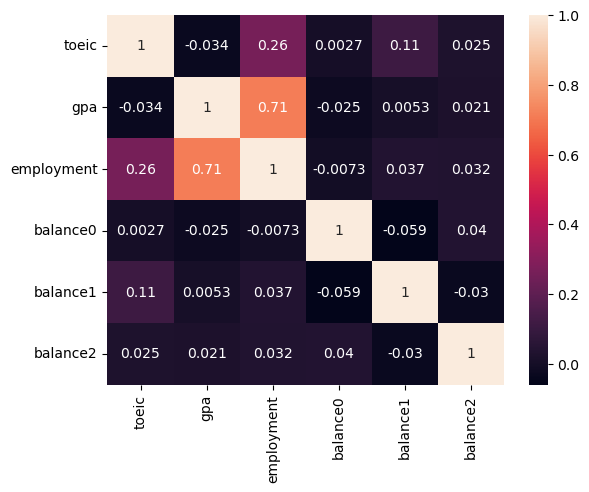

In [32]:
sns.heatmap(df_train.corr(), annot = True)

> `balance0 ~ 2`는 `employment`와의 상관성이 낮다. 따라서 제거하고 분석한다.

In [35]:
## 1
X = df_train.loc[:, :'gpa']
y = df_train.employment

## 2
predictr = sklearn.linear_model.LogisticRegression()

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y)

0.882

\- Lasso를 이용한 제거 예시

In [10]:
np.random.seed(1)
df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment.csv')
df_balance = pd.DataFrame((np.random.randn(500,3)).reshape(500,3)*1,columns = ['balance'+str(i) for i in range(3)])
df_train = pd.concat([df,df_balance],axis=1)
df_train

,toeic,gpa,employment,balance0,balance1,balance2
0,135,0.051535,0,1.624345,-0.611756,-0.528172
1,935,0.355496,0,-1.072969,0.865408,-2.301539
2,485,2.228435,0,1.744812,-0.761207,0.319039
3,65,1.179701,0,-0.249370,1.462108,-2.060141
4,445,3.962356,1,-0.322417,-0.384054,1.133769
...,...,...,...,...,...,...
495,280,4.288465,1,-1.326490,0.308204,1.115489
496,310,2.601212,1,1.008196,-3.016032,-1.619646
497,225,0.042323,0,2.005141,-0.187626,-0.148941
498,320,1.041416,0,1.165335,0.196645,-0.632590


> 로지스틱 선형 회귀가 필요한 경우이다. 로지스틱 또한 penalty 계열 분석을 할 수 있다.

In [23]:
## 1
X = df_train.drop('employment', axis = 1)
y = df_train.employment

## 2
predictr = sklearn.linear_model.LogisticRegressionCV(Cs = [0.1, 1, 10, 100], penalty = 'l1', solver = 'liblinear', random_state = 42)

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y)

0.876

In [24]:
predictr.coef_

array([[0.00260249, 1.41401358, 0.        , 0.        , 0.        ]])

In [28]:
s = pd.Series(predictr.coef_.reshape(-1))  ## 시리즈의 경우 1차원의 입력값만 받는다.
s.index = X.columns
s

toeic       0.002602
gpa         1.414014
balance0    0.000000
balance1    0.000000
balance2    0.000000
dtype: float64

> 위에서 쓸모없는 것을 제거하고 분석한 것에 비해 점수가 낮지만, 쓸모없는 것이라는 사실을 모르는 상황에서는 Lasso가 상당히 괜찮다.

### **D. 이상치의 존재**
---




<span style=color:red>문제</span> : 이상치가 존재할 경우 전체 모형이 무너질 수 있음

\- 해결방법

> * 이상치를 제거하고 분석
> > 느낌적으로 제거
> >
> > 이상치를 감지하는 지표를 사용하여 제거
> >
> > 이상치를 자동으로 감지하는 모형 사용하여 이상치 제거 후 분석
> 
> * 로버스트 선형회귀 계열을 이용 > 이상치에 큰 영향을 받지 않음
> > `sklearn.linear_model.HuberRegressor` 등
> 
> * 이상치를 완화시키는 변환을 사용
> > `sklearn.preprocessing.PowerTransformer`를 이용

In [36]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:100,3].to_numpy()
temp.sort()
ice_sales = 10 + temp * 0.5 + np.random.randn(100)
ice_sales[0] = 50
df_train = pd.DataFrame({'temp':temp,'ice_sales':ice_sales})[:10]
df_train

,temp,ice_sales
0,-4.1,50.000000
1,-3.7,9.234175
2,-3.0,9.642778
3,-1.3,9.657894
4,-0.5,9.987787
5,-0.3,10.205951
6,0.3,8.486925
7,0.4,8.817227
8,0.4,8.273155
9,0.7,8.863784


In [37]:
transformr = sklearn.preprocessing.PowerTransformer()

transformr.fit_transform(df_train)

array([[-1.40729341,  2.42405408],
       [-1.31406689, -0.18677452],
       [-1.13030154,  0.16485704],
       [-0.50278108,  0.17667635],
       [-0.02130412,  0.41617603],
       [ 0.13926015,  0.55696978],
       [ 0.81742569, -1.03040835],
       [ 0.96759638, -0.62032873],
       [ 0.96759638, -1.33362249],
       [ 1.48386844, -0.56759919]])

In [42]:
x, y = transformr.fit_transform(df_train).T
x, y

(array([-1.40729341, -1.31406689, -1.13030154, -0.50278108, -0.02130412,
         0.13926015,  0.81742569,  0.96759638,  0.96759638,  1.48386844]),
 array([ 2.42405408, -0.18677452,  0.16485704,  0.17667635,  0.41617603,
         0.55696978, -1.03040835, -0.62032873, -1.33362249, -0.56759919]))

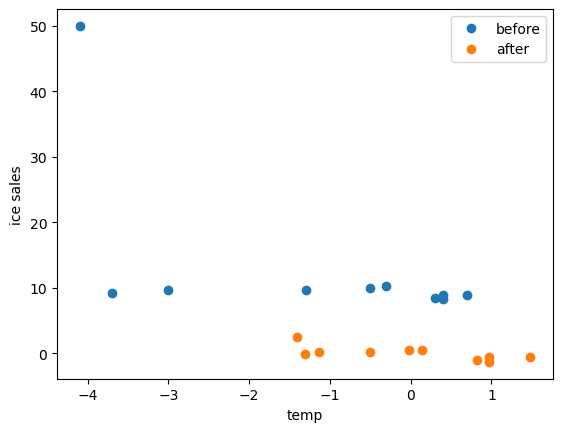

In [50]:
plt.plot(df_train.temp, df_train.ice_sales, 'o', label = 'before')
plt.plot(x, y, 'o', label = 'after')
plt.xlabel('temp')
plt.ylabel('ice sales')
plt.legend()
plt.show()

> 강제로 정규화한 모습이다.

In [52]:
transformr.inverse_transform(transformr.fit_transform(df_train))

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([[-4.1       , 50.        ],
       [-3.7       ,  9.2341745 ],
       [-3.        ,  9.64277825],
       [-1.3       ,  9.65789368],
       [-0.5       ,  9.98778744],
       [-0.3       , 10.20595116],
       [ 0.3       ,  8.48692458],
       [ 0.4       ,  8.81722682],
       [ 0.4       ,  8.27315516],
       [ 0.7       ,  8.8637837 ]])

In [56]:
df_train

,temp,ice_sales
0,-4.1,50.000000
1,-3.7,9.234175
2,-3.0,9.642778
3,-1.3,9.657894
4,-0.5,9.987787
5,-0.3,10.205951
6,0.3,8.486925
7,0.4,8.817227
8,0.4,8.273155
9,0.7,8.863784


> 어차피 역변환 할 수 있는 것은 상관이 없다.

### **E. 교호작용의 존재**
---




<span style=color:red>문제</span> : 설명 변수 간의 상호작용이 있는 경우, 이를 고려하지 않으면 데이터를 잘 설명하지 못할 수 있음.

\- 해결방안

> * 교호작용이 있는 열들의 값끼리 곱함
> * 교호작용에 영향을 받지 않는 모델 사용
> > `sklearn.tree.DecisionTreeRegressor()`

\- 교호작용이 있는 열을 곱함

In [61]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/weightloss.csv')
df_train

,Supplement,Exercise,Weight_Loss
0,False,False,-0.877103
1,True,False,1.604542
2,True,True,13.824148
3,True,True,13.004505
4,True,True,13.701128
...,...,...,...
9995,True,False,1.558841
9996,False,False,-0.217816
9997,False,True,4.072701
9998,True,False,-0.253796


In [63]:
df_train.pivot_table(index = 'Supplement', columns = 'Exercise', values = 'Weight_Loss', aggfunc = 'mean')

Exercise,False,True
Supplement,,
False,0.021673,4.991314
True,0.497573,14.966363


> 둘 다 했을 때 가장 평균이 높고, 각각 하는 것만으로는 그렇게 큰 영향은 없는 것 같다.

**교호작용을 고려하지 않은 분석**

In [62]:
## 1
X = df_train.drop('Weight_Loss', axis = 1)
y = df_train.Weight_Loss

## 2
predictr = sklearn.linear_model.LinearRegression()

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y)

0.8208414124769222

In [64]:
predictr.coef_

array([5.21904037, 9.74766346])

> 보충제는 5kg, 운동은 10kg의 감량효과가 있다고 추정하고 있다.

In [67]:
df_train.assign(Weight_Loss_hat = predictr.predict(X)).drop('Weight_Loss', axis = 1)\
.pivot_table(index = 'Supplement', columns = 'Exercise', values = 'Weight_Loss_hat', aggfunc = 'mean')

Exercise,False,True
Supplement,,
False,-2.373106,7.374557
True,2.845934,12.593598


> 예측값과 실제 값의 차이가 크다.

**교호작용을 고려한 분석**

In [68]:
df_train.assign(Interaction = df_train.Supplement * df_train.Exercise)

,Supplement,Exercise,Weight_Loss,Interaction
0,False,False,-0.877103,False
1,True,False,1.604542,False
2,True,True,13.824148,True
3,True,True,13.004505,True
4,True,True,13.701128,True
...,...,...,...,...
9995,True,False,1.558841,False
9996,False,False,-0.217816,False
9997,False,True,4.072701,False
9998,True,False,-0.253796,False


In [70]:
## 1
_df = df_train.assign(Interaction = df_train.Supplement * df_train.Exercise)
X = _df.drop('Weight_Loss', axis = 1)
y = _df.Weight_Loss

## 2
predictr = sklearn.linear_model.LinearRegression()

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y)

0.9727754257714795

> 정확도가 개선되었다.

In [73]:
df_train.assign(Weight_Loss_hat = predictr.predict(X)).drop('Weight_Loss', axis = 1)\
.pivot_table(index = 'Supplement', columns = 'Exercise', values = 'Weight_Loss_hat', aggfunc = 'mean')

Exercise,False,True
Supplement,,
False,0.021673,4.991314
True,0.497573,14.966363


> 평균을 보면(오차를 제거함) 표본과 동일한 것을 볼 수 있다.

## 3. 교호작용

### **A. 아이스크림 타입 별 판매량**
---




\- 왠지 익숙한 데이터

In [75]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()
choco = 40 + temp * 2.0 + np.random.randn(100)*3
vanilla = 60 + temp * 5.0 + np.random.randn(100)*3
df1 = pd.DataFrame({'temp':temp,'sales':choco}).assign(type='choco')
df2 = pd.DataFrame({'temp':temp,'sales':vanilla}).assign(type='vanilla')
df_train = pd.concat([df1,df2])
df_train

,temp,sales,type
0,-4.1,32.950261,choco
1,-3.7,35.852524,choco
2,-3.0,37.428335,choco
3,-1.3,38.323681,choco
4,-0.5,39.713362,choco
...,...,...,...
95,12.4,119.708075,vanilla
96,13.4,129.300464,vanilla
97,14.7,136.596568,vanilla
98,15.0,136.213140,vanilla


In [76]:
set(df_train.type)

{'choco', 'vanilla'}

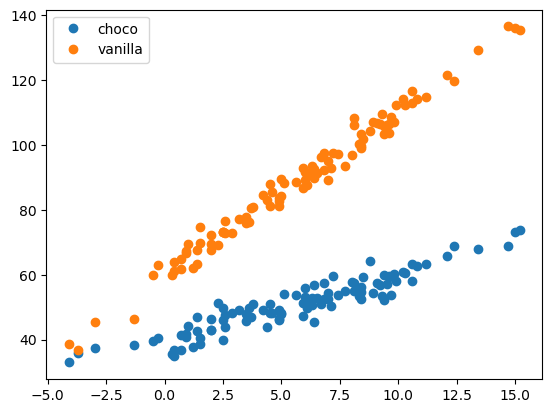

In [80]:
plt.plot(df_train.loc[df_train.type == 'choco'].temp, df_train.loc[df_train.type == 'choco'].sales, 'o', label = 'choco')
plt.plot(df_train.loc[df_train.type != 'choco'].temp, df_train.loc[df_train.type != 'choco'].sales, 'o', label = 'vanilla')
plt.legend()
plt.show()

\- 아이스크림의 종류에 따라 온도가 판매량에 미치는 정도가 다를 것으로 예상된다.

> 아이스크림 종류와 온도간에 교호작용이 있다.

**교호작용을 고려하지 않은 경우**

In [83]:
## 1
X = pd.get_dummies(df_train.drop('sales', axis = 1))
y = df_train.sales

## 2
predictr = sklearn.linear_model.LinearRegression()

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y)

0.9249530603100549

> 이것만으로도 나름 높은 점수가 나오긴 했지만... 언제나 개선할 수 있는 건 개선해야 한다.

In [85]:
_df = df_train.assign(sales_hat = predictr.predict(X))

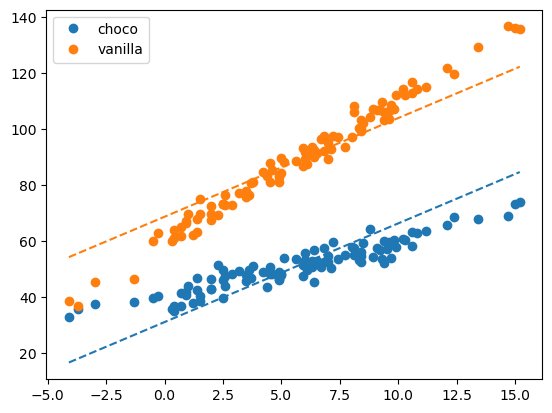

In [87]:
plt.plot(df_train.loc[df_train.type == 'choco'].temp, df_train.loc[df_train.type == 'choco'].sales, 'o', label = 'choco')
plt.plot(df_train.loc[df_train.type != 'choco'].temp, df_train.loc[df_train.type != 'choco'].sales, 'o', label = 'vanilla')

plt.plot(df_train.loc[df_train.type == 'choco'].temp, _df.loc[df_train.type == 'choco'].sales_hat, '--', color = 'C0')
plt.plot(df_train.loc[df_train.type != 'choco'].temp, _df.loc[df_train.type != 'choco'].sales_hat, '--', color = 'C1')

plt.legend()
plt.show()

> 마음속의 언더라잉과 맞지 않는다 : 언더피팅된 상황이다.

**교호작용을 고려**

In [101]:
van = pd.get_dummies(df_train.type, drop_first = True)*1
van

,vanilla
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


In [104]:
_df = df_train.assign(Interaction = df_train.temp * van.vanilla)
_df

,temp,sales,type,Interaction
0,-4.1,32.950261,choco,-0.0
1,-3.7,35.852524,choco,-0.0
2,-3.0,37.428335,choco,-0.0
3,-1.3,38.323681,choco,-0.0
4,-0.5,39.713362,choco,-0.0
...,...,...,...,...
95,12.4,119.708075,vanilla,12.4
96,13.4,129.300464,vanilla,13.4
97,14.7,136.596568,vanilla,14.7
98,15.0,136.213140,vanilla,15.0


In [106]:
## 1
X = pd.get_dummies(_df.drop('sales', axis = 1), drop_first = True)
y = _df.sales

## 2
predictr = sklearn.linear_model.LinearRegression()

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y)

0.9865793819066231

> 점수가 훨씬 높게 나왔다.

In [107]:
__df = _df.assign(sales_hat = predictr.predict(X))
__df

,temp,sales,type,Interaction,sales_hat
0,-4.1,32.950261,choco,-0.0,31.403121
1,-3.7,35.852524,choco,-0.0,32.209366
2,-3.0,37.428335,choco,-0.0,33.620295
3,-1.3,38.323681,choco,-0.0,37.046835
4,-0.5,39.713362,choco,-0.0,38.659325
...,...,...,...,...,...
95,12.4,119.708075,vanilla,12.4,122.492017
96,13.4,129.300464,vanilla,13.4,127.521196
97,14.7,136.596568,vanilla,14.7,134.059129
98,15.0,136.213140,vanilla,15.0,135.567883


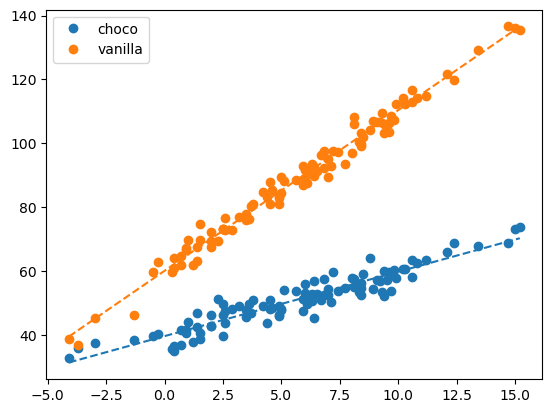

In [108]:
plt.plot(df_train.loc[df_train.type == 'choco'].temp, df_train.loc[df_train.type == 'choco'].sales, 'o', label = 'choco')
plt.plot(df_train.loc[df_train.type != 'choco'].temp, df_train.loc[df_train.type != 'choco'].sales, 'o', label = 'vanilla')

plt.plot(df_train.loc[df_train.type == 'choco'].temp, __df.loc[df_train.type == 'choco'].sales_hat, '--', color = 'C0')
plt.plot(df_train.loc[df_train.type != 'choco'].temp, __df.loc[df_train.type != 'choco'].sales_hat, '--', color = 'C1')

plt.legend()
plt.show()

In [109]:
predictr.coef_

array([ 2.01561216,  3.01356716, 20.46306209])

> 모델이 언더라잉을 잘 따라가는 것을 볼 수 있다.(애초에 계수가 세개가 됨...)

### **B. 교호작용, tree**
---




`sklearn.tree.DecisionTreeRegressor()`를 사용하면 교호작용을 손쉽게 적합할 수 있다.

In [117]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()
choco = 40 + temp * 2.0 + np.random.randn(100)*3
vanilla = 60 + temp * 5.0 + np.random.randn(100)*3
df1 = pd.DataFrame({'temp':temp,'sales':choco}).assign(type='choco')
df2 = pd.DataFrame({'temp':temp,'sales':vanilla}).assign(type='vanilla')
df_train = pd.concat([df1,df2])
df_train

,temp,sales,type
0,-4.1,32.950261,choco
1,-3.7,35.852524,choco
2,-3.0,37.428335,choco
3,-1.3,38.323681,choco
4,-0.5,39.713362,choco
...,...,...,...
95,12.4,119.708075,vanilla
96,13.4,129.300464,vanilla
97,14.7,136.596568,vanilla
98,15.0,136.213140,vanilla


> 아까와 동일한 자료를 tree로 분석해보자...

In [118]:
## 1
X = pd.get_dummies(df_train.drop('sales', axis = 1), drop_first = True)
y = df_train.sales

## 2
predictr = sklearn.tree.DecisionTreeRegressor()

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y)

0.9963887702553287

> 높은 스코어가 나온다.(오버피팅된 것은 아닐까?)

In [119]:
_df = df_train.assign(sales_hat = predictr.predict(X))
_df

,temp,sales,type,sales_hat
0,-4.1,32.950261,choco,32.950261
1,-3.7,35.852524,choco,35.852524
2,-3.0,37.428335,choco,37.428335
3,-1.3,38.323681,choco,38.323681
4,-0.5,39.713362,choco,39.713362
...,...,...,...,...
95,12.4,119.708075,vanilla,119.708075
96,13.4,129.300464,vanilla,129.300464
97,14.7,136.596568,vanilla,136.596568
98,15.0,136.213140,vanilla,136.213140


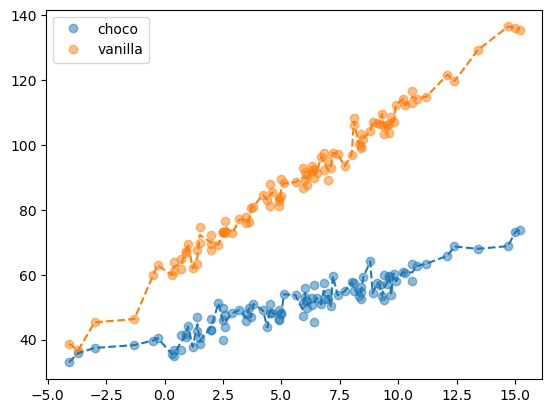

In [121]:
plt.plot(df_train.loc[df_train.type == 'choco'].temp, df_train.loc[df_train.type == 'choco'].sales, 'o', label = 'choco', alpha = 0.5)
plt.plot(df_train.loc[df_train.type != 'choco'].temp, df_train.loc[df_train.type != 'choco'].sales, 'o', label = 'vanilla', alpha = 0.5)

plt.plot(df_train.loc[df_train.type == 'choco'].temp, _df.loc[df_train.type == 'choco'].sales_hat, '--', color = 'C0')
plt.plot(df_train.loc[df_train.type != 'choco'].temp, _df.loc[df_train.type != 'choco'].sales_hat, '--', color = 'C1')

plt.legend()
plt.show()

> 오차항까지 적합하고는 있으나... 처음 교호작용을 고려하지 않은 모델보다 성능은 좋은 것 같다. 따라서 이는 상당히 유용하다.